In [1]:
import pandas as pd
import polars as pl
import time

from content.utils import polars_read_tsv_file

DATASET_FILE = "content/data/imdb_dataset/"
READ_ARGS = {
    "quote_char": None,
    "separator": "\t",
    "null_values": ["\\N", "nan"]
}

def read_imdb_tsv_file(filename_stem):
    return polars_read_tsv_file(DATASET_FILE + f"{filename_stem}")

def scan_imdb_tsv_file(filename_stem):
    return pl.scan_csv(DATASET_FILE + f"{filename_stem}.tsv", **READ_ARGS)

def read_imdb_parquet_file(filename_stem):
    return pl.read_parquet(DATASET_FILE + f"{filename_stem}.parquet")

def scan_imdb_parquet_file(filename_stem):
    return pl.scan_parquet(DATASET_FILE + f"{filename_stem}.parquet")

def convert_file_to_parquet(filename_stem, sort_column=None):
    df = read_imdb_tsv_file(filename_stem)
    if sort_column:
        df = df.sort(sort_column)
    df.write_parquet(DATASET_FILE + f"{filename_stem}.parquet")

## Reading CSV in Polars

In Polars, files can be read directly into memory just as in Pandas.
Users of Pandas might know that there is an option to provide a selection of columns you want to read to save resources.
Polars, however, takes this a bit further.
In Polars you have a lazy loading option, which permits scanning files instead of reading them directly into memory.
This creates an instance of a `LazyFrame` instead of a `DataFrame`.
The scanning operation keeps a reference to the file, while permitting users to define any processing of the data without ever reading the file.
The file conents are then only read when the user finally collects the data by calling `LazyFrame.collect()`.
As a consequence, Polars can reorder any operations performed on the `LazyFrame` to create an optimal query plan, which often allows for much faster processing with a significantly lower memory usage.

Let us read the file containing all movie titles from the IMDB dataset and inspect the first 15 titles.

In [2]:

start_time = time.time()
movie_titles = read_imdb_tsv_file("title.basics")
print(f"{time.time() - start_time} seconds for Polars")
display(movie_titles.head(15))

8.783271551132202 seconds for Polars


tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i64,str,i64,str
"""tt0000001""","""short""","""Carmencita""","""Carmencita""",0,1894,null,1,"""Documentary,Short"""
"""tt0000002""","""short""","""Le clown et ses chiens""","""Le clown et ses chiens""",0,1892,null,5,"""Animation,Short"""
"""tt0000003""","""short""","""Pauvre Pierrot""","""Pauvre Pierrot""",0,1892,null,5,"""Animation,Comedy,Romance"""
"""tt0000004""","""short""","""Un bon bock""","""Un bon bock""",0,1892,null,12,"""Animation,Short"""
"""tt0000005""","""short""","""Blacksmith Scene""","""Blacksmith Scene""",0,1893,null,1,"""Comedy,Short"""
…,…,…,…,…,…,…,…,…
"""tt0000011""","""short""","""Akrobatisches Potpourri""","""Akrobatisches Potpourri""",0,1895,null,1,"""Documentary,Short"""
"""tt0000012""","""short""","""The Arrival of a Train""","""L'arrivée d'un train à La Ciot…",0,1896,null,1,"""Documentary,Short"""
"""tt0000013""","""short""","""The Photographical Congress Ar…","""Le débarquement du congrès de …",0,1895,null,1,"""Documentary,Short"""


As you can see, this takes quite a bit of time.
What if we only scan the file, filter the first 15 items and only then collect the data?

In [3]:
start_time = time.time()
movie_titles = scan_imdb_tsv_file("title.basics")
print(f"{time.time() - start_time} seconds for Polars")
display(movie_titles.head(15).collect())
del movie_titles

0.04641914367675781 seconds for Polars


tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i64,str,i64,str
"""tt0000001""","""short""","""Carmencita""","""Carmencita""",0,1894,null,1,"""Documentary,Short"""
"""tt0000002""","""short""","""Le clown et ses chiens""","""Le clown et ses chiens""",0,1892,null,5,"""Animation,Short"""
"""tt0000003""","""short""","""Pauvre Pierrot""","""Pauvre Pierrot""",0,1892,null,5,"""Animation,Comedy,Romance"""
"""tt0000004""","""short""","""Un bon bock""","""Un bon bock""",0,1892,null,12,"""Animation,Short"""
"""tt0000005""","""short""","""Blacksmith Scene""","""Blacksmith Scene""",0,1893,null,1,"""Comedy,Short"""
…,…,…,…,…,…,…,…,…
"""tt0000011""","""short""","""Akrobatisches Potpourri""","""Akrobatisches Potpourri""",0,1895,null,1,"""Documentary,Short"""
"""tt0000012""","""short""","""The Arrival of a Train""","""L'arrivée d'un train à La Ciot…",0,1896,null,1,"""Documentary,Short"""
"""tt0000013""","""short""","""The Photographical Congress Ar…","""Le débarquement du congrès de …",0,1895,null,1,"""Documentary,Short"""


Ah, much better!
The scanning operation and the consequent slicing operation to select the first 15 items allows Polars to only read partially read the file and return the 15 rows as soon as they have been read.

What would Pandas do?

In [4]:

start_time = time.time()
movies_pandas = pd.read_csv(DATASET_FILE + "title.basics.tsv", sep="\t")
movies_pandas.head(15)
print(f"{time.time() - start_time} seconds for Pandas")

/tmp/ipykernel_1084/1431290308.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_pandas = pd.read_csv(DATASET_FILE + "title.basics.tsv", sep="\t")


17.130154609680176 seconds for Pandas


## I want to watch a good movie!

With the knowledge we obtained above, let's only scan the movies and the corresponding ratings (defined in a separate file).
To find the movies that are the best according to the users who rated, we will have to join the two together.
Polars defines joins on this with different join strategy types which most of you will know from databases theory and any packages that deal with data.
Apart from `left`, `right`, `inner`, `outer` and `cross` joins, the `semi` and `anti` join are also available in Polars.

In [5]:
movie_titles = scan_imdb_tsv_file("title.basics")
actors = scan_imdb_tsv_file("name.basics")
ratings = scan_imdb_tsv_file("title.ratings")

best_movies_lf = (
    movie_titles.join(ratings, on="tconst", how="inner")
    .with_columns(pl.col("averageRating"))
    .sort("numVotes", descending=True)
    .sort("averageRating", descending=True)
    .filter(pl.col("numVotes") > 100000, pl.col("titleType") == "movie")
)

best_movies_lf.collect()

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
str,str,str,str,i64,i64,str,i64,str,f64,i64
"""tt0111161""","""movie""","""The Shawshank Redemption""","""The Shawshank Redemption""",0,1994,null,142,"""Drama""",9.3,2943515
"""tt0068646""","""movie""","""The Godfather""","""The Godfather""",0,1972,null,175,"""Crime,Drama""",9.2,2051638
"""tt0050083""","""movie""","""12 Angry Men""","""12 Angry Men""",0,1957,null,96,"""Crime,Drama""",9.0,884854
"""tt0071562""","""movie""","""The Godfather Part II""","""The Godfather Part II""",0,1974,null,202,"""Crime,Drama""",9.0,1386823
"""tt0108052""","""movie""","""Schindler's List""","""Schindler's List""",0,1993,null,195,"""Biography,Drama,History""",9.0,1476229
…,…,…,…,…,…,…,…,…,…,…
"""tt10886166""","""movie""","""365 Days""","""365 dni""",0,2020,null,114,"""Drama,Romance""",3.3,100617
"""tt1073498""","""movie""","""Meet the Spartans""","""Meet the Spartans""",0,2008,null,87,"""Comedy,Fantasy""",2.8,112204
"""tt12915716""","""movie""","""Adipurush""","""Adipurush""",0,2023,null,179,"""Action,Adventure,Drama""",2.7,133991


### Exercise 4.2
Create a ranking of the 20 best movies according to the user ratings using the `LazyFrame` instance.
For this, you will have to join the ratings with the movie data.
Don't forget the number of votes, or your ranking will be worthless.
Can you get close to the official IMDB ranking?

In [6]:
movie_titles = read_imdb_tsv_file("title.basics")
ratings = read_imdb_tsv_file("title.ratings")

(
    movie_titles.join(ratings, on="tconst", how="inner")
    .with_columns(pl.col("averageRating"))
    .sort("averageRating", descending=True)
    .filter(pl.col("titleType") == "movie", pl.col("numVotes") > 100000)
    .head(20)
)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
str,str,str,str,i64,i64,str,i64,str,f64,i64
"""tt0111161""","""movie""","""The Shawshank Redemption""","""The Shawshank Redemption""",0,1994,null,142,"""Drama""",9.3,2943515
"""tt0068646""","""movie""","""The Godfather""","""The Godfather""",0,1972,null,175,"""Crime,Drama""",9.2,2051638
"""tt0050083""","""movie""","""12 Angry Men""","""12 Angry Men""",0,1957,null,96,"""Crime,Drama""",9.0,884854
"""tt0071562""","""movie""","""The Godfather Part II""","""The Godfather Part II""",0,1974,null,202,"""Crime,Drama""",9.0,1386823
"""tt0108052""","""movie""","""Schindler's List""","""Schindler's List""",0,1993,null,195,"""Biography,Drama,History""",9.0,1476229
…,…,…,…,…,…,…,…,…,…,…
"""tt0073486""","""movie""","""One Flew Over the Cuckoo's Nes…","""One Flew Over the Cuckoo's Nes…",0,1975,null,133,"""Drama""",8.7,1087177
"""tt0080684""","""movie""","""Star Wars: Episode V - The Emp…","""Star Wars: Episode V - The Emp…",0,1980,null,124,"""Action,Adventure,Fantasy""",8.7,1401875
"""tt0099685""","""movie""","""Goodfellas""","""Goodfellas""",0,1990,null,145,"""Biography,Crime,Drama""",8.7,1280879


### Exercise 4.3

Let's take it one step further!
Can we find the 20 actors whose known-for movies are the highest ranking movies on average?
Again, do not forget to take the number of votes into account as well!
For this you may have to `explode()` the data frame and may additionally need to `split()` a column with comma-separated values.

In [7]:
actors = scan_imdb_tsv_file("name.basics")

best_actors = (
    actors.filter(pl.col("primaryProfession").str.contains("actor|actress"))
    .with_columns(pl.col("knownForTitles").str.split(",").alias("tconst"))
    .explode("tconst")
    .join(ratings.lazy(), on="tconst", how="inner")
    .join(movie_titles.lazy(), on="tconst", how="inner")
    .filter(
        pl.col("numVotes") > 10000,
        pl.col("titleType") == "movie",
        pl.col("runtimeMinutes") > 70,
    )
    .group_by(["nconst", "primaryName", "birthYear"])
    .agg(
        ((pl.col("averageRating") - 5.0) * (pl.col("numVotes").log())).sum(),
    )
    .sort("averageRating", descending=True)
)
best_actors.head(20).collect()["primaryName"].to_list()

['John P. Nugent',
 'Marie Fink',
 'John Rhys-Davies',
 'Elijah Wood',
 'Orlando Bloom',
 'Hugo Weaving',
 'Fa Suluvave',
 'Katherine Jackson',
 'Peter Swords King',
 'Wesley Priest',
 'Carola Broekhoff',
 'Alan Lee',
 'Ngila Dickson',
 'Lani Jackson',
 'Warren Green',
 'David Williams',
 'David A. Burt',
 'Jeremy Ryder',
 'Sean Astin',
 'Brett Beattie']

As the last query is likely quite a complex one, it can provide a nice example for the query optimization of Polars.
If you did not manage to do the last one or skipped it, you can also do this with the query from before.
In that case, if the query is already optimal, you may want to reverse the order or introduce some extra (unnecessary) statements, such as additional sorting operations before the final sort.

The LazyFrame, also sometimes referred to as a query as it builds up the query through the operations the user defines on the object, provides insights in how queries are built up and how Polars automatically optimizes the query for us before collecting the data.
These insights can be obtained through the `explain` method, which gives an overview of the query steps in text, or through the `show_graph` method, which gives a visual overview of the steps through an extra extension, as shown below.
For both of these methods you can pass in `True` or `False` for the parameter `optimized` in order to compare the optimized with the naive query plan.

### Exercise 4.4
Use the `explain()` and `show_graph()` method on the `LazyFrame` instance constructed in the last exercise to compare the optimized query with the naive one.

FILTER [([(col("numVotes")) > (100000)]) & ([(col("titleType")) == (String(movie))])] FROM
  SORT BY [col("averageRating")]
    SORT BY [col("numVotes")]
       WITH_COLUMNS:
       [col("averageRating")] 
        INNER JOIN:
        LEFT PLAN ON: [col("tconst")]
          Csv SCAN [content/data/imdb_dataset/title.basics.tsv]
          PROJECT */9 COLUMNS
        RIGHT PLAN ON: [col("tconst")]
          Csv SCAN [content/data/imdb_dataset/title.ratings.tsv]
          PROJECT */3 COLUMNS
        END INNER JOIN
SORT BY [col("averageRating")]
   WITH_COLUMNS:
   [col("averageRating")] 
    FILTER [([(col("numVotes")) > (100000)]) & ([(col("titleType")) == (String(movie))])] FROM
      INNER JOIN:
      LEFT PLAN ON: [col("tconst")]
        Csv SCAN [content/data/imdb_dataset/title.basics.tsv]
        PROJECT */9 COLUMNS
      RIGHT PLAN ON: [col("tconst")]
        Csv SCAN [content/data/imdb_dataset/title.ratings.tsv]
        PROJECT */3 COLUMNS
      END INNER JOIN


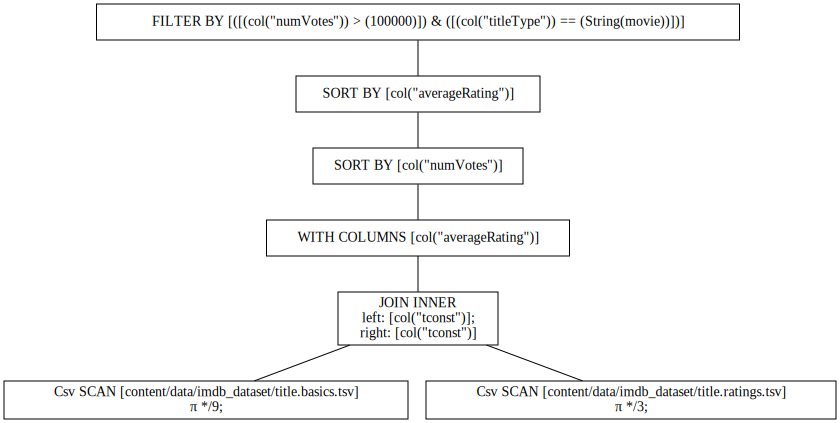

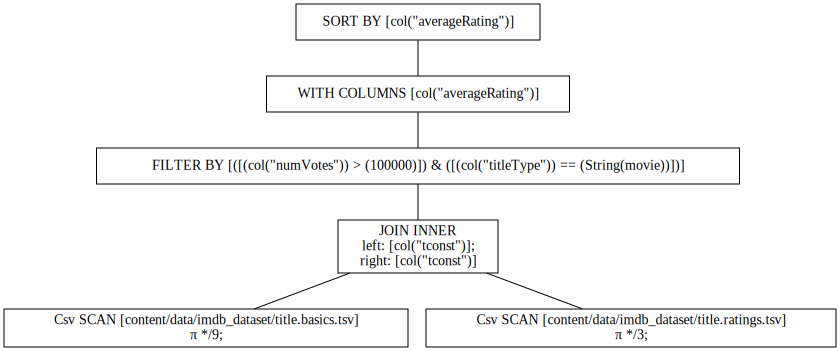

In [8]:
print(best_movies_lf.explain(optimized=False))
print(best_movies_lf.explain(optimized=True))
best_movies_lf.show_graph(optimized=False)
best_movies_lf.show_graph(optimized=True)

## Parquet files

CSV (or TSV) files are easy to work with, human-readable and supported by a wide range of different tools (if you have to work with people who only want to deal with Excel...).
However, it is typically not the most efficient format for storing data.
One of the reasons is that data is stored in row-based fashion, which does not allow us to efficiently read only required columns.
Apart from that, there is no compression and intelligent rearrangement of data to avoid having to read only a certain portion of it.

This is where Parquet comes in!
Parquet is a file format which originates from an open-source project under the Apache Software Foundation (hence the full name Apache Parquet).
In contrast to CSV, the format is a columnar-storage format.
This change also opened up possibilities for column-based encoding and compression, which now allows for optimal techniques for the types contained in the column, which is stored along with the contents itself.

Let's use Polars to read in the CSV files and convert them to Parquet files!

### Exercise 4.5
#### Exercise 4.5.1
Convert the title.ratings and the name.basics files to Parquet files using Polars.

In [9]:
convert_file_to_parquet("title.basics", "titleType")
convert_file_to_parquet("title.ratings", "averageRating")
convert_file_to_parquet("name.basics")


#### Exercise 4.5.2 
Would there be any speed difference if we now perform the same operations as above on the CSV files to obtain a list of the best-ranked movies?
Rewrite exercise 4.2 to use the Parquet files instead and measure the difference in execution time.

In [10]:
movie_titles = read_imdb_parquet_file("title.basics")
ratings = read_imdb_parquet_file("title.ratings")

movie_titles.join(ratings, on="tconst", how="inner").with_columns(
    pl.col("averageRating")
).sort("numVotes", descending=True).filter(
    pl.col("titleType") == "movie", pl.col("numVotes") > 100000
).sort("averageRating", descending=True)


tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
str,str,str,str,i64,i64,str,i64,str,f64,i64
"""tt0111161""","""movie""","""The Shawshank Redemption""","""The Shawshank Redemption""",0,1994,null,142,"""Drama""",9.3,2943515
"""tt0068646""","""movie""","""The Godfather""","""The Godfather""",0,1972,null,175,"""Crime,Drama""",9.2,2051638
"""tt0468569""","""movie""","""The Dark Knight""","""The Dark Knight""",0,2008,null,152,"""Action,Crime,Drama""",9.0,2923614
"""tt0167260""","""movie""","""The Lord of the Rings: The Ret…","""The Lord of the Rings: The Ret…",0,2003,null,201,"""Action,Adventure,Drama""",9.0,2014326
"""tt0108052""","""movie""","""Schindler's List""","""Schindler's List""",0,1993,null,195,"""Biography,Drama,History""",9.0,1476229
…,…,…,…,…,…,…,…,…,…,…
"""tt10886166""","""movie""","""365 Days""","""365 dni""",0,2020,null,114,"""Drama,Romance""",3.3,100617
"""tt1073498""","""movie""","""Meet the Spartans""","""Meet the Spartans""",0,2008,null,87,"""Comedy,Fantasy""",2.8,112204
"""tt12915716""","""movie""","""Adipurush""","""Adipurush""",0,2023,null,179,"""Action,Adventure,Drama""",2.7,133991


In [11]:
movie_titles = scan_imdb_parquet_file("title.basics")
ratings = scan_imdb_parquet_file("title.ratings")

best_movies_lf = movie_titles.join(ratings, on="tconst", how="inner").with_columns(
    pl.col("averageRating")
).sort("numVotes", descending=True).filter(
    pl.col("titleType") == "movie", pl.col("numVotes") > 100000
).sort("averageRating", descending=True)

best_movies_lf.collect()

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
str,str,str,str,i64,i64,str,i64,str,f64,i64
"""tt0111161""","""movie""","""The Shawshank Redemption""","""The Shawshank Redemption""",0,1994,null,142,"""Drama""",9.3,2943515
"""tt0068646""","""movie""","""The Godfather""","""The Godfather""",0,1972,null,175,"""Crime,Drama""",9.2,2051638
"""tt0050083""","""movie""","""12 Angry Men""","""12 Angry Men""",0,1957,null,96,"""Crime,Drama""",9.0,884854
"""tt0071562""","""movie""","""The Godfather Part II""","""The Godfather Part II""",0,1974,null,202,"""Crime,Drama""",9.0,1386823
"""tt0108052""","""movie""","""Schindler's List""","""Schindler's List""",0,1993,null,195,"""Biography,Drama,History""",9.0,1476229
…,…,…,…,…,…,…,…,…,…,…
"""tt10886166""","""movie""","""365 Days""","""365 dni""",0,2020,null,114,"""Drama,Romance""",3.3,100617
"""tt1073498""","""movie""","""Meet the Spartans""","""Meet the Spartans""",0,2008,null,87,"""Comedy,Fantasy""",2.8,112204
"""tt12915716""","""movie""","""Adipurush""","""Adipurush""",0,2023,null,179,"""Action,Adventure,Drama""",2.7,133991
